In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

random.seed(42)

PATH_TO_DATA = '../data/'

In [2]:
verbatim_file = PATH_TO_DATA + 'processed/single_csv/verbatim.csv'
verbatim_df = pd.read_csv(verbatim_file)
verbatim_df.tail(3)

,gbifID,eventDate,continent,country,stateProvince,decimalLatitude,decimalLongitude,scientificName,vernacularName,higherClassification,family
3674057,3905003113,2022-08-13,Europe,Germany,Nordrhein-Westfalen,51.186953,6.072675,Lycaena phlaeas,Small Copper,Animalia|Lycaenidae,Lycaenidae
3674058,3907062141,2022-08-13,Europe,Netherlands,Drenthe,53.000000,6.400000,Pyronia tithonus,Gatekeeper,Animalia|Nymphalidae,Nymphalidae
3674059,4889724145,2022-08-14,Europe,United Kingdom,England - Cheshire,53.221595,-2.512970,Triodia sylvina,Orange Swift,Animalia|Hepialidae,Hepialidae


In [3]:
multimedia_file = PATH_TO_DATA + 'processed/single_csv/multimedia.csv'
multimedia_df = pd.read_csv(multimedia_file)
multimedia_df.tail(3)

,gbifID,format,identifier
4271285,4891549309,image/jpeg,https://observation.org/photos/91183706.jpg
4271286,4891549354,image/jpeg,https://observation.org/photos/91196424.jpg
4271287,4891549377,image/jpeg,https://observation.org/photos/91209494.jpg


In [4]:
verbatim_df['scientificName'].describe()

count             3674060
unique               7664
top       Pararge aegeria
freq                75939
Name: scientificName, dtype: object

In [5]:
species_counts = verbatim_df['scientificName'].value_counts()
amounts = [100000, 10000, 3000, 2000, 1000, 0]

for idx in range(1, len(amounts)):
    lower_bound = amounts[idx]
    upper_bound = amounts[idx - 1]
    count = len(species_counts[(species_counts > lower_bound) & (species_counts <= upper_bound)])
    print(f'Amount of different species with {lower_bound} to {upper_bound} occurrences: {count}')

Amount of different species with 10000 to 100000 occurrences: 76
Amount of different species with 3000 to 10000 occurrences: 201
Amount of different species with 2000 to 3000 occurrences: 110
Amount of different species with 1000 to 2000 occurrences: 202
Amount of different species with 0 to 1000 occurrences: 7075


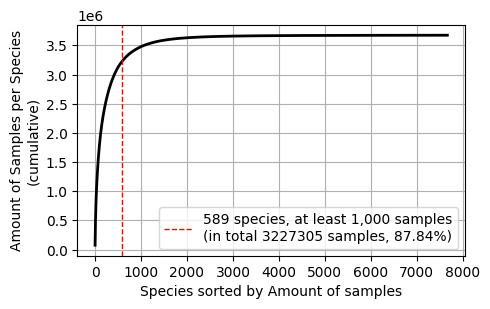

In [11]:
species_counts_sorted = species_counts.sort_values(ascending=False)
cumulative_occurrences = species_counts_sorted.cumsum()
cumulative_species = range(1, len(species_counts_sorted) + 1)

plt.figure(figsize=(5, 3))
plt.plot(cumulative_species, cumulative_occurrences, color='black', lw=2)

# plt.axvline(x=76, color='b', lw=1, linestyle='--', 
#            label=f'76 species w >10k samples (Total: {cumulative_occurrences.iloc[75]} | {100*cumulative_occurrences.iloc[75]/cumulative_occurrences.iloc[-1]:.2f}%)')
# plt.axvline(x=277, color='g', lw=1, linestyle='--', 
#            label=f'277 species w >3k samples (Total: {cumulative_occurrences.iloc[277]}  | {100*cumulative_occurrences.iloc[277]/cumulative_occurrences.iloc[-1]:.2f}%)')
plt.axvline(x=589, color='r', lw=1, linestyle='--', 
            label=f'589 species, at least 1,000 samples\n(in total {cumulative_occurrences.iloc[588]} samples, {100*cumulative_occurrences.iloc[588]/cumulative_occurrences.iloc[-1]:.2f}%)')
plt.xlabel('Species sorted by Amount of samples')
plt.ylabel('Amount of Samples per Species\n(cumulative)')

plt.legend()
plt.grid(True)
plt.show()

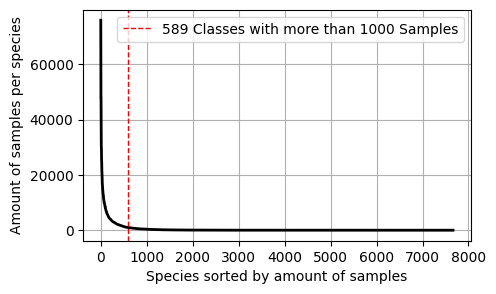

In [7]:
plt.figure(figsize=(5, 3))
plt.plot(cumulative_species, species_counts_sorted, color='black', lw=2)

plt.axvline(x=589, color='r', lw=1, linestyle='--', 
            label=f'589 Classes with more than 1000 Samples')
plt.legend()

plt.xlabel('Species sorted by amount of samples')
plt.ylabel('Amount of samples per species')
plt.grid(True)
plt.show()

### Plotting all species with more than 1k samples

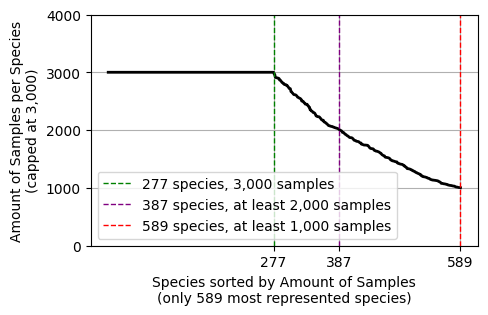

In [17]:
above_1000s_threshold = 589
species_counts_top589 = species_counts.head(above_1000s_threshold)

species_counts_sorted = species_counts_top589.sort_values(ascending=False)


cumulative_occurrences = species_counts_sorted.cumsum()
cumulative_species = range(1, len(species_counts_sorted) + 1)

# capped at 3000 species to represent actual dataset configurations
species_counts_sorted = [min(x, 3000) for x in species_counts_sorted if x > 0]


plt.figure(figsize=(5, 3))
plt.plot(cumulative_species, species_counts_sorted, color='black', lw=2)

plt.axvline(x=277, color='g', lw=1, linestyle='--', 
           label=f'277 species, 3,000 samples')
plt.axvline(x=387, color='purple', lw=1, linestyle='--', 
           label=f'387 species, at least 2,000 samples')
plt.axvline(x=589, color='r', lw=1, linestyle='--', 
            label=f'589 species, at least 1,000 samples')
plt.xlabel('Species sorted by Amount of Samples\n(only 589 most represented species)')
plt.ylabel('Amount of Samples per Species\n(capped at 3,000)')
plt.yticks(np.arange(0, 4001, 1000))
plt.xticks([277,387,589])
plt.grid(True)
plt.legend()
plt.show()

In [9]:
print(f'Average amount of samples per class: {np.mean(species_counts_top589):.1f}')

Average amount of samples per class: 5479.3


### Calculating dataset size (in occurrences) with different sample amounts

In [10]:
# amount of samples (to download) by selecting at most 10k, 5k, 3k occurrences in all species above 1k
for upper_boundary in [10000, 5000, 3000]:
    above_boudary_species_samples = len(species_counts_top589[species_counts_top589 > upper_boundary]) * upper_boundary
    below_boudary_species_samples = species_counts_top589[species_counts_top589 < upper_boundary].sum()
    print(f"Amount of samples to download with maximum {upper_boundary} images per species: {above_boudary_species_samples + below_boudary_species_samples}")

Amount of samples to download with maximum 10000 images per species: 2374494
Amount of samples to download with maximum 5000 images per species: 1809956
Amount of samples to download with maximum 3000 images per species: 1388034
